In [1]:
import pandas as pd
import numpy as np
#import geopandas
#import shapely.geometry as geom
import seaborn as sns
#import matplotlib.pyplot as plt
%matplotlib inline

## Reading and Preparing Estimated Trips Zones data

In [2]:
est_trips_zones = pd.read_csv('/local/tarciso/data/od-matrix/est-trips-zones-all.csv', 
                             usecols=['cardNum','date','cod_zona_o','cod_macrozona_o','cod_zona_d','cod_macrozona_d'],
                             parse_dates=['date'])

## Generating All Estimated Trips OD Matrix for Macrozones

In [3]:
est_trips_zones.head()

,cardNum,date,cod_zona_o,cod_macrozona_o,cod_zona_d,cod_macrozona_d
0,324934.0,2017-05-01,371,2.0,303,1.0
1,324934.0,2017-05-01,301,1.0,441,1.0
2,324934.0,2017-05-01,421,1.0,303,1.0
3,326014.0,2017-05-01,801,5.0,321,1.0
4,334095.0,2017-05-01,541,2.0,362,1.0


In [4]:
len(est_trips_zones)

3187680

In [5]:
all_est_macrozones_trips = est_trips_zones.groupby(['cod_macrozona_o','cod_macrozona_d']).cardNum.count().reset_index(name='num_pass')

In [6]:
all_est_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,244964
1,1.0,2.0,107054
2,1.0,3.0,112093
3,1.0,4.0,62696
4,1.0,5.0,116371
5,1.0,6.0,128468
6,1.0,7.0,45207
7,1.0,8.0,49829
8,1.0,9.0,34401
9,1.0,10.0,11191


In [7]:
all_est_macrozones_freqs = all_est_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [8]:
all_est_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,244964,107054,112093,62696,116371,128468,45207,49829,34401,11191
2.0,112819,56018,19678,18328,12373,39770,44274,49052,23613,15558
3.0,154721,18814,43583,8254,14909,27769,10310,8225,4818,1657
4.0,98477,14376,3851,36653,8688,3069,4826,15781,1443,1175
5.0,150767,12492,14327,11544,51784,6342,4223,4802,1316,679
6.0,152699,34030,27328,5848,7899,72546,26256,13669,22235,6222
7.0,76566,40026,10122,7729,4182,26766,30207,24891,17621,16928
8.0,85470,48875,5936,17935,3973,11703,21810,47956,7941,11446
9.0,68670,25335,4712,3209,1898,22899,19217,8711,12898,2720


In [9]:
all_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/all_est_macrozones_freqs.csv')

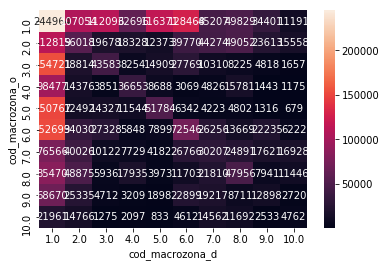

In [10]:
sns.heatmap(all_est_macrozones_freqs, annot=True, fmt="d")

In [11]:
all_est_macrozones_norm_freqs = all_est_macrozones_freqs/all_est_macrozones_freqs.values.sum()

In [12]:
all_est_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.077042,0.033669,0.035254,0.019718,0.036599,0.040404,0.014218,0.015671,0.010819,0.003520
2.0,0.035482,0.017618,0.006189,0.005764,0.003891,0.012508,0.013924,0.015427,0.007426,0.004893
3.0,0.048660,0.005917,0.013707,0.002596,0.004689,0.008733,0.003243,0.002587,0.001515,0.000521
4.0,0.030971,0.004521,0.001211,0.011528,0.002732,0.000965,0.001518,0.004963,0.000454,0.000370
5.0,0.047417,0.003929,0.004506,0.003631,0.016286,0.001995,0.001328,0.001510,0.000414,0.000214
6.0,0.048024,0.010703,0.008595,0.001839,0.002484,0.022816,0.008258,0.004299,0.006993,0.001957
7.0,0.024080,0.012588,0.003183,0.002431,0.001315,0.008418,0.009500,0.007828,0.005542,0.005324
8.0,0.026881,0.015371,0.001867,0.005641,0.001250,0.003681,0.006859,0.015082,0.002497,0.003600
9.0,0.021597,0.007968,0.001482,0.001009,0.000597,0.007202,0.006044,0.002740,0.004056,0.000855


In [13]:
all_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/all_est_macrozones_norm_freqs.csv')

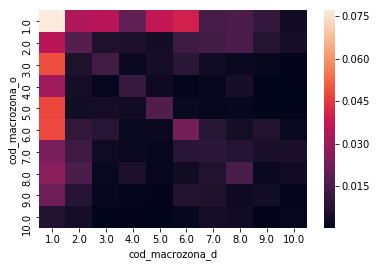

In [14]:
sns.heatmap(all_est_macrozones_norm_freqs)

## Generating Estimated Trips OD Matrix for Zones

In [15]:
all_est_zones_trips = est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [16]:
all_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,103,103,25
1,103,166,7
2,103,301,71
3,103,302,12
4,103,303,30
5,103,311,330
6,103,321,8
7,103,331,2
8,103,341,8
9,103,351,20


In [17]:
all_est_zones_freqs = all_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [18]:
all_est_zones_freqs

cod_zona_d,103,152,161,166,257,301,302,303,311,321,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,25.0,0.0,0.0,7.0,0.0,71.0,12.0,30.0,330.0,8.0,...,1.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,8.0,3.0,10.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,31.0,0.0,7.0,90.0,0.0,188.0,550.0,512.0,121.0,378.0,...,546.0,168.0,494.0,168.0,222.0,382.0,84.0,49.0,601.0,104.0
302,1.0,0.0,2.0,106.0,0.0,575.0,18.0,57.0,91.0,426.0,...,23.0,45.0,27.0,29.0,24.0,169.0,194.0,256.0,1192.0,233.0
303,30.0,0.0,1.0,359.0,1.0,50.0,991.0,1392.0,78.0,5182.0,...,1314.0,1302.0,1527.0,392.0,969.0,1346.0,3502.0,3349.0,4036.0,3594.0
311,445.0,0.0,0.0,25.0,0.0,204.0,90.0,202.0,310.0,57.0,...,2.0,8.0,7.0,2.0,3.0,37.0,35.0,16.0,42.0,28.0


In [19]:
all_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/all_est_zones_freqs.csv')

In [ ]:
sns.heatmap(all_est_zones_freqs)

In [ ]:
all_est_zones_norm_freqs = all_est_zones_freqs/all_est_zones_freqs.values.sum()

In [ ]:
all_est_zones_norm_freqs

In [ ]:
all_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/all_est_zones_norm_freqs.csv')

In [ ]:
sns.heatmap(all_est_zones_norm_freqs)

# Re-running analysis for only weekdays

In [ ]:
wday_est_trips_zones = est_trips_zones[est_trips_zones['date'].dt.dayofweek != 5]

In [ ]:
len(wday_est_trips_zones)

In [ ]:
len(est_trips_zones)

In [ ]:
wday_est_trips_zones.head()

## Generating Weekday Estimated Trips OD Matrix for Macrozones

In [ ]:
wday_est_macrozones_trips = wday_est_trips_zones.groupby(['cod_macrozona_o','cod_macrozona_d']).cardNum.count().reset_index(name='num_pass')

In [ ]:
wday_est_macrozones_trips

In [ ]:
wday_est_macrozones_freqs = wday_est_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [32]:
wday_est_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,243596,107053,112093,62696,116371,122766,45207,49829,34401,11191
2.0,112163,56018,19678,18328,12373,39770,44274,49052,23613,15558
3.0,154721,18814,43583,8254,14909,27769,10310,8225,4818,1657
4.0,98477,14376,3851,36653,8688,3069,4826,15781,1443,1175
5.0,150767,12492,14327,11544,51784,6342,4223,4802,1316,679
6.0,149181,33718,27328,5848,7899,71123,26256,13669,22235,6222
7.0,76566,40026,10122,7729,4182,26766,30207,24891,17621,16928
8.0,85470,48875,5936,17935,3973,11703,21810,47956,7941,11446
9.0,68670,25335,4712,3209,1898,22899,19217,8711,12875,2720


In [33]:
wday_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/wday_est_macrozones_freqs.csv')

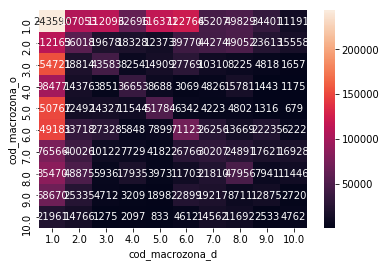

In [34]:
sns.heatmap(wday_est_macrozones_freqs, annot=True, fmt="d")

In [35]:
wday_est_macrozones_norm_freqs = wday_est_macrozones_freqs/wday_est_macrozones_freqs.values.sum()

In [36]:
wday_est_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.076927,0.033807,0.035398,0.019799,0.036749,0.038769,0.014276,0.015736,0.010864,0.003534
2.0,0.035421,0.017690,0.006214,0.005788,0.003907,0.012559,0.013982,0.015490,0.007457,0.004913
3.0,0.048860,0.005941,0.013763,0.002607,0.004708,0.008769,0.003256,0.002597,0.001522,0.000523
4.0,0.031099,0.004540,0.001216,0.011575,0.002744,0.000969,0.001524,0.004984,0.000456,0.000371
5.0,0.047612,0.003945,0.004524,0.003646,0.016353,0.002003,0.001334,0.001516,0.000416,0.000214
6.0,0.047111,0.010648,0.008630,0.001847,0.002494,0.022460,0.008292,0.004317,0.007022,0.001965
7.0,0.024179,0.012640,0.003196,0.002441,0.001321,0.008453,0.009539,0.007860,0.005565,0.005346
8.0,0.026991,0.015435,0.001875,0.005664,0.001255,0.003696,0.006888,0.015144,0.002508,0.003615
9.0,0.021686,0.008001,0.001488,0.001013,0.000599,0.007231,0.006069,0.002751,0.004066,0.000859


In [37]:
wday_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/wday_est_macrozones_norm_freqs.csv')

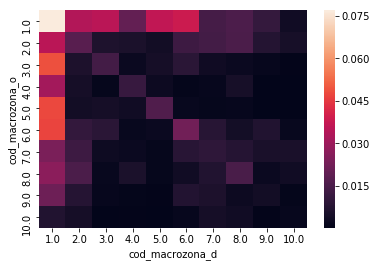

In [38]:
sns.heatmap(wday_est_macrozones_norm_freqs)

## Generating Weekday Estimated Trips OD Matrix for Zones

In [39]:
wday_est_zones_trips = wday_est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [40]:
wday_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,103,103,25
1,103,166,7
2,103,301,71
3,103,302,12
4,103,303,30
5,103,311,330
6,103,321,8
7,103,331,2
8,103,341,8
9,103,351,20


In [41]:
wday_est_zones_freqs = wday_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [42]:
wday_est_zones_freqs

cod_zona_d,103,152,161,166,257,301,302,303,311,321,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,25.0,0.0,0.0,7.0,0.0,71.0,12.0,30.0,330.0,8.0,...,1.0,0.0,13.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,8.0,3.0,10.0,2.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,31.0,0.0,7.0,90.0,0.0,188.0,550.0,512.0,121.0,378.0,...,546.0,168.0,494.0,168.0,222.0,382.0,84.0,49.0,601.0,104.0
302,1.0,0.0,2.0,106.0,0.0,575.0,18.0,57.0,91.0,426.0,...,23.0,45.0,27.0,29.0,24.0,169.0,194.0,256.0,1192.0,233.0
303,30.0,0.0,1.0,359.0,1.0,50.0,991.0,1392.0,78.0,5182.0,...,1314.0,1302.0,1527.0,392.0,969.0,1346.0,3502.0,3349.0,4036.0,3594.0
311,445.0,0.0,0.0,25.0,0.0,204.0,90.0,202.0,310.0,57.0,...,2.0,8.0,7.0,2.0,3.0,37.0,35.0,16.0,42.0,28.0


In [43]:
wday_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/wday_est_zones_freqs.csv')

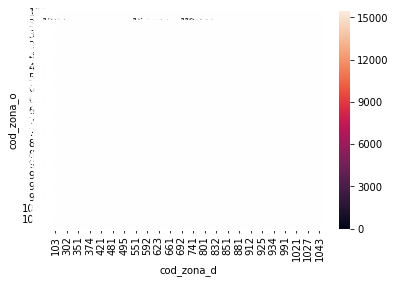

In [44]:
sns.heatmap(wday_est_zones_freqs, annot=True, fmt="f")

In [45]:
wday_est_zones_norm_freqs = wday_est_zones_freqs/wday_est_zones_freqs.values.sum()

In [46]:
wday_est_zones_norm_freqs

cod_zona_d,103,152,161,166,257,301,302,303,311,321,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,7.874817e-06,0.000000e+00,0.000000e+00,2.204949e-06,0.000000e+00,2.236448e-05,3.779912e-06,9.449780e-06,1.039476e-04,0.000003,...,3.149927e-07,0.000000e+00,0.000004,9.449780e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.149927e-07,6.299853e-07
111,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.149927e-07,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
152,3.149927e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.299853e-07,0.000000e+00,3.149927e-07,3.149927e-06,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
166,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.519941e-06,9.449780e-07,3.149927e-06,6.299853e-07,0.000003,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.149927e-07,0.000000e+00,0.000000e+00,0.000000e+00
257,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.149927e-07,0.000000e+00,0.000000,...,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
301,9.764773e-06,0.000000e+00,2.204949e-06,2.834934e-05,0.000000e+00,5.921862e-05,1.732460e-04,1.612762e-04,3.811411e-05,0.000119,...,1.719860e-04,5.291877e-05,0.000156,5.291877e-05,6.992837e-05,1.203272e-04,2.645938e-05,1.543464e-05,1.893106e-04,3.275924e-05
302,3.149927e-07,0.000000e+00,6.299853e-07,3.338922e-05,0.000000e+00,1.811208e-04,5.669868e-06,1.795458e-05,2.866433e-05,0.000134,...,7.244832e-06,1.417467e-05,0.000009,9.134788e-06,7.559824e-06,5.323376e-05,6.110858e-05,8.063812e-05,3.754713e-04,7.339329e-05
303,9.449780e-06,0.000000e+00,3.149927e-07,1.130824e-04,3.149927e-07,1.574963e-05,3.121577e-04,4.384698e-04,2.456943e-05,0.001632,...,4.139004e-04,4.101205e-04,0.000481,1.234771e-04,3.052279e-04,4.239801e-04,1.103104e-03,1.054910e-03,1.271310e-03,1.132084e-03
311,1.401717e-04,0.000000e+00,0.000000e+00,7.874817e-06,0.000000e+00,6.425851e-05,2.834934e-05,6.362852e-05,9.764773e-05,0.000018,...,6.299853e-07,2.519941e-06,0.000002,6.299853e-07,9.449780e-07,1.165473e-05,1.102474e-05,5.039883e-06,1.322969e-05,8.819795e-06


In [47]:
wday_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/wday_est_zones_norm_freqs.csv')

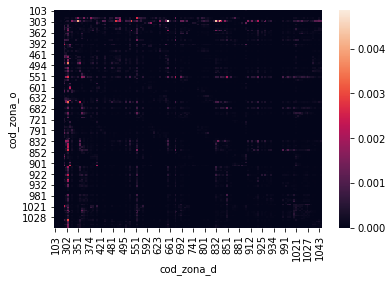

In [48]:
sns.heatmap(wday_est_zones_norm_freqs)

# Re-running analysis for only May

In [54]:
may_est_trips_zones = est_trips_zones[est_trips_zones['date'].dt.month == 5]

In [55]:
len(may_est_trips_zones)

1782950

In [51]:
len(est_trips_zones)

3187680

In [56]:
may_est_trips_zones.tail()

,cardNum,date,cod_zona_o,cod_macrozona_o,cod_zona_d,cod_macrozona_d
1782945,10111704.0,2017-05-30,303,1.0,632,5.0
1782946,10111805.0,2017-05-30,802,5.0,592,4.0
1782947,10111805.0,2017-05-30,592,4.0,802,5.0
1782948,10111860.0,2017-05-30,1025,8.0,303,1.0
1782949,10111873.0,2017-05-30,303,1.0,832,6.0


## Generating May Estimated Trips OD Matrix for Macrozones

In [57]:
may_est_macrozones_trips = may_est_trips_zones.groupby(['cod_macrozona_o','cod_macrozona_d']).cardNum.count().reset_index(name='num_pass')

In [58]:
may_est_macrozones_trips

,cod_macrozona_o,cod_macrozona_d,num_pass
0,1.0,1.0,134227
1,1.0,2.0,57387
2,1.0,3.0,64270
3,1.0,4.0,30852
4,1.0,5.0,65431
5,1.0,6.0,69238
6,1.0,7.0,27363
7,1.0,8.0,27481
8,1.0,9.0,20046
9,1.0,10.0,6949


In [59]:
may_est_macrozones_freqs = may_est_macrozones_trips.pivot(index='cod_macrozona_o',columns='cod_macrozona_d',values='num_pass')

In [60]:
may_est_macrozones_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,134227,57387,64270,30852,65431,69238,27363,27481,20046,6949
2.0,61467,31523,11047,9446,6523,21115,25376,27220,13656,9217
3.0,85700,10844,25788,4265,8303,15947,6215,4758,2926,1037
4.0,47114,7686,2168,17840,4057,1603,2660,7955,848,712
5.0,84242,6886,8256,5671,29236,3487,2414,2675,762,402
6.0,84905,19552,15520,3000,4115,41438,14999,7772,12681,3770
7.0,44537,22251,5940,4168,2271,14442,17573,14163,10130,10035
8.0,48279,27960,3575,9707,2248,6933,12749,28105,4814,6928
9.0,41375,15105,2968,1933,1119,13627,11329,5206,7652,1674


In [61]:
may_est_macrozones_freqs.to_csv('/local/tarciso/data/od-mat-validation/may_est_macrozones_freqs.csv')

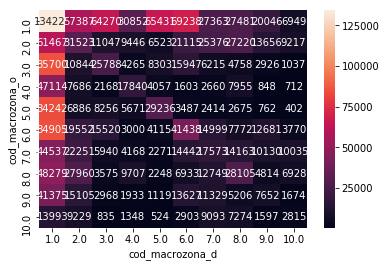

In [62]:
sns.heatmap(may_est_macrozones_freqs, annot=True, fmt="d")

In [63]:
may_est_macrozones_norm_freqs = may_est_macrozones_freqs/may_est_macrozones_freqs.values.sum()

In [64]:
may_est_macrozones_norm_freqs

cod_macrozona_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozona_o,,,,,,,,,,
1.0,0.075474,0.032268,0.036138,0.017348,0.036791,0.038932,0.015386,0.015452,0.011272,0.003907
2.0,0.034562,0.017725,0.006212,0.005311,0.003668,0.011873,0.014269,0.015305,0.007679,0.005183
3.0,0.048188,0.006097,0.014500,0.002398,0.004669,0.008967,0.003495,0.002675,0.001645,0.000583
4.0,0.026492,0.004322,0.001219,0.010031,0.002281,0.000901,0.001496,0.004473,0.000477,0.000400
5.0,0.047368,0.003872,0.004642,0.003189,0.016439,0.001961,0.001357,0.001504,0.000428,0.000226
6.0,0.047741,0.010994,0.008727,0.001687,0.002314,0.023300,0.008434,0.004370,0.007130,0.002120
7.0,0.025043,0.012511,0.003340,0.002344,0.001277,0.008121,0.009881,0.007964,0.005696,0.005643
8.0,0.027147,0.015722,0.002010,0.005458,0.001264,0.003898,0.007169,0.015803,0.002707,0.003896
9.0,0.023265,0.008493,0.001669,0.001087,0.000629,0.007662,0.006370,0.002927,0.004303,0.000941


In [65]:
may_est_macrozones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/may_est_macrozones_norm_freqs.csv')

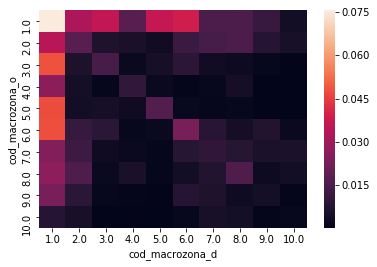

In [66]:
sns.heatmap(may_est_macrozones_norm_freqs)

## Generating May Estimated Trips OD Matrix for Zones

In [67]:
may_est_zones_trips = may_est_trips_zones.groupby(['cod_zona_o','cod_zona_d']).cardNum.count().reset_index(name='num_pass')

In [68]:
may_est_zones_trips

,cod_zona_o,cod_zona_d,num_pass
0,103,103,10
1,103,166,3
2,103,301,41
3,103,302,6
4,103,303,16
5,103,311,137
6,103,321,4
7,103,331,2
8,103,341,4
9,103,351,13


In [69]:
may_est_zones_freqs = may_est_zones_trips.pivot(index='cod_zona_o',columns='cod_zona_d',values='num_pass').fillna(0)

In [70]:
may_est_zones_freqs

cod_zona_d,103,152,161,166,257,301,302,303,311,321,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,10.0,0.0,0.0,3.0,0.0,41.0,6.0,16.0,137.0,4.0,...,1.0,0.0,6.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
257,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
301,20.0,0.0,7.0,46.0,0.0,65.0,298.0,223.0,67.0,219.0,...,348.0,68.0,293.0,108.0,145.0,252.0,39.0,24.0,346.0,50.0
302,0.0,0.0,2.0,75.0,0.0,268.0,9.0,27.0,37.0,266.0,...,16.0,33.0,12.0,20.0,18.0,122.0,116.0,128.0,713.0,120.0
303,12.0,0.0,1.0,225.0,1.0,20.0,546.0,741.0,45.0,2805.0,...,744.0,753.0,884.0,245.0,635.0,874.0,2233.0,1957.0,2586.0,2246.0
311,273.0,0.0,0.0,13.0,0.0,99.0,39.0,120.0,110.0,20.0,...,1.0,4.0,1.0,0.0,0.0,23.0,18.0,8.0,22.0,15.0


In [71]:
may_est_zones_freqs.to_csv('/local/tarciso/data/od-mat-validation/may_est_zones_freqs.csv')

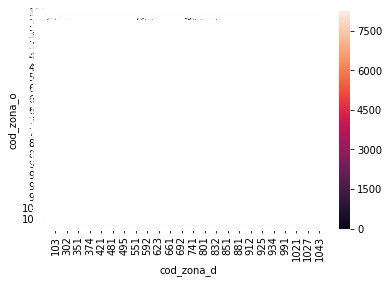

In [72]:
sns.heatmap(may_est_zones_freqs, annot=True, fmt="f")

In [73]:
may_est_zones_norm_freqs = may_est_zones_freqs/may_est_zones_freqs.values.sum()

In [74]:
may_est_zones_norm_freqs

cod_zona_d,103,152,161,166,257,301,302,303,311,321,...,1025,1026,1027,1028,1029,1031,1041,1042,1043,1044
cod_zona_o,,,,,,,,,,,,,,,,,,,,,
103,5.608682e-06,0.000000,0.000000e+00,1.682605e-06,0.000000e+00,2.299560e-05,3.365209e-06,8.973892e-06,7.683895e-05,0.000002,...,5.608682e-07,0.000000,3.365209e-06,0.000001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.608682e-07,0.000000e+00
111,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
152,5.608682e-07,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.608682e-07,0.000000e+00,0.000000e+00,2.804341e-06,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
166,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,3.365209e-06,0.000000e+00,1.121736e-06,0.000000e+00,0.000002,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,5.608682e-07,0.000000e+00,0.000000e+00,0.000000e+00
257,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.608682e-07,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
301,1.121736e-05,0.000000,3.926078e-06,2.579994e-05,0.000000e+00,3.645643e-05,1.671387e-04,1.250736e-04,3.757817e-05,0.000123,...,1.951821e-04,0.000038,1.643344e-04,0.000061,8.132589e-05,1.413388e-04,2.187386e-05,1.346084e-05,1.940604e-04,2.804341e-05
302,0.000000e+00,0.000000,1.121736e-06,4.206512e-05,0.000000e+00,1.503127e-04,5.047814e-06,1.514344e-05,2.075212e-05,0.000149,...,8.973892e-06,0.000019,6.730419e-06,0.000011,1.009563e-05,6.842592e-05,6.506071e-05,7.179113e-05,3.998990e-04,6.730419e-05
303,6.730419e-06,0.000000,5.608682e-07,1.261954e-04,5.608682e-07,1.121736e-05,3.062341e-04,4.156034e-04,2.523907e-05,0.001573,...,4.172860e-04,0.000422,4.958075e-04,0.000137,3.561513e-04,4.901988e-04,1.252419e-03,1.097619e-03,1.450405e-03,1.259710e-03
311,1.531170e-04,0.000000,0.000000e+00,7.291287e-06,0.000000e+00,5.552595e-05,2.187386e-05,6.730419e-05,6.169550e-05,0.000011,...,5.608682e-07,0.000002,5.608682e-07,0.000000,0.000000e+00,1.289997e-05,1.009563e-05,4.486946e-06,1.233910e-05,8.413023e-06


In [75]:
may_est_zones_norm_freqs.to_csv('/local/tarciso/data/od-mat-validation/may_est_zones_norm_freqs.csv')

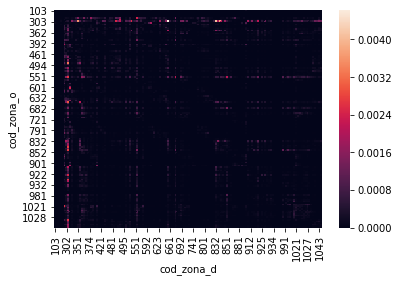

In [76]:
sns.heatmap(may_est_zones_norm_freqs)